# 8. Project: Markov Simulation

### In this project, you will write a program that simulates customer behaviour in a supermarket.

Task:
1. explore the data (includes pandas wrangling)
2. calculate transition probabilities (a 5x5 matrix)
3. implement a customer class
4. run a MCMC simulation for a single customer
5. extend the simulation to multiple customers
6. Upload your code to GitHub

## <<< Data Exploration >>>

In [365]:
#!pip install numpy

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
mon = pd.read_csv("data/monday.csv", sep=";", index_col=[0], parse_dates=True)
tue = pd.read_csv("data/tuesday.csv", sep=";", index_col=[0], parse_dates=True)
wed = pd.read_csv("data/wednesday.csv", sep=";", index_col=[0], parse_dates=True)
thr = pd.read_csv("data/thursday.csv", sep=";", index_col=[0], parse_dates=True)
fri = pd.read_csv("data/friday.csv", sep=";", index_col=[0], parse_dates=True)

In [31]:
mon.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [32]:
# Add a unique identifier for the customers throughout the weeks
mon["id"] = "mon" + "-" + mon.customer_no.astype(str)
tue["id"] = "tue" + "-" + tue.customer_no.astype(str)
wed["id"] = "wed" + "-" + wed.customer_no.astype(str)
thr["id"] = "thr" + "-" + thr.customer_no.astype(str)
fri["id"] = "fri" + "-" + fri.customer_no.astype(str)

In [33]:
fri

,customer_no,location,id
timestamp,,,
2019-09-06 07:00:00,1,dairy,fri-1
2019-09-06 07:00:00,2,drinks,fri-2
2019-09-06 07:00:00,3,fruit,fri-3
2019-09-06 07:01:00,2,checkout,fri-2
2019-09-06 07:01:00,4,drinks,fri-4
...,...,...,...
2019-09-06 21:50:00,1500,dairy,fri-1500
2019-09-06 21:50:00,1507,checkout,fri-1507
2019-09-06 21:50:00,1508,checkout,fri-1508


In [34]:
df = pd.concat([mon, tue, wed, thr, fri], axis=0)

In [35]:
df.drop(["customer_no"], axis=1, inplace=True)

In [36]:
df

,location,id
timestamp,,
2019-09-02 07:03:00,dairy,mon-1
2019-09-02 07:03:00,dairy,mon-2
2019-09-02 07:04:00,dairy,mon-3
2019-09-02 07:04:00,dairy,mon-4
2019-09-02 07:04:00,spices,mon-5
...,...,...
2019-09-06 21:50:00,dairy,fri-1500
2019-09-06 21:50:00,checkout,fri-1507
2019-09-06 21:50:00,checkout,fri-1508


- Calculate the total number of customers in each section

- Calculate the total number of customers in each section over time

- Display the number of customers at checkout over time

- Calculate the time each customer spent in the market

- Calculate the total number of customers in the supermarket over time.

### 1. Calculate the total number of customers in each section


In [37]:
df.groupby(["location"]).count()

,id
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


### 2. Calculate the total number of customers in each section over time


In [71]:
df["hour"] = df.index.hour
df["time"] = df.index.time
df["min"] = df.index.minute
df["weekday"] = df.index.day_name()


<AxesSubplot:xlabel='hour', ylabel='count'>

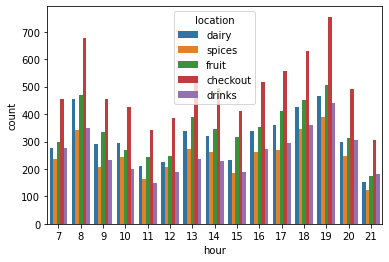

In [39]:
sns.countplot(data=df, x="hour", hue="location")


In [40]:
df.groupby([df['hour'], 'weekday'])['id'].count().unstack()

weekday,Friday,Monday,Thursday,Tuesday,Wednesday
hour,,,,,
7,305,317,315,328,279
8,469,364,447,463,547
9,254,308,323,262,373
10,296,282,303,267,283
11,275,189,227,133,287
12,283,265,234,199,271
13,357,412,297,330,358
14,359,305,299,343,344
15,258,342,266,223,246


### 3. Display the number of customers at checkout over time


<AxesSubplot:xlabel='hour', ylabel='count'>

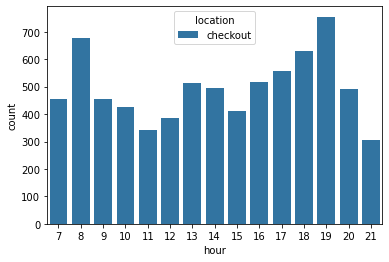

In [41]:
sns.countplot(data=df.loc[df["location"] == "checkout"], x="hour", hue = "location")

### 4. Calculate the time each customer spent in the market


In [42]:
df.head()

,location,id,hour,min,weekday
timestamp,,,,,
2019-09-02 07:03:00,dairy,mon-1,7,3,Monday
2019-09-02 07:03:00,dairy,mon-2,7,3,Monday
2019-09-02 07:04:00,dairy,mon-3,7,4,Monday
2019-09-02 07:04:00,dairy,mon-4,7,4,Monday
2019-09-02 07:04:00,spices,mon-5,7,4,Monday


In [43]:
df.reset_index()

,timestamp,location,id,hour,min,weekday
0,2019-09-02 07:03:00,dairy,mon-1,7,3,Monday
1,2019-09-02 07:03:00,dairy,mon-2,7,3,Monday
2,2019-09-02 07:04:00,dairy,mon-3,7,4,Monday
3,2019-09-02 07:04:00,dairy,mon-4,7,4,Monday
4,2019-09-02 07:04:00,spices,mon-5,7,4,Monday
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,dairy,fri-1500,21,50,Friday
24873,2019-09-06 21:50:00,checkout,fri-1507,21,50,Friday
24874,2019-09-06 21:50:00,checkout,fri-1508,21,50,Friday
24875,2019-09-06 21:50:00,drinks,fri-1509,21,50,Friday


In [55]:
# list of customers
unique_customer = df["id"].unique()
for customer in unique_customer:
    df.loc[df[str(customer)]]

mon-1
mon-2
mon-3
mon-4
mon-5
mon-6
mon-7
mon-8
mon-9
mon-10
mon-11
mon-12
mon-13
mon-14
mon-15
mon-16
mon-17
mon-18
mon-19
mon-20
mon-21
mon-22
mon-23
mon-24
mon-25
mon-26
mon-27
mon-28
mon-29
mon-30
mon-31
mon-32
mon-33
mon-34
mon-35
mon-36
mon-37
mon-38
mon-39
mon-40
mon-41
mon-42
mon-43
mon-44
mon-45
mon-46
mon-47
mon-48
mon-49
mon-50
mon-51
mon-52
mon-53
mon-54
mon-55
mon-56
mon-57
mon-58
mon-59
mon-60
mon-61
mon-62
mon-63
mon-64
mon-65
mon-66
mon-67
mon-68
mon-69
mon-70
mon-71
mon-72
mon-73
mon-74
mon-75
mon-76
mon-77
mon-78
mon-79
mon-80
mon-81
mon-82
mon-83
mon-84
mon-85
mon-86
mon-87
mon-88
mon-89
mon-90
mon-91
mon-92
mon-93
mon-94
mon-95
mon-96
mon-97
mon-98
mon-99
mon-100
mon-101
mon-102
mon-103
mon-104
mon-105
mon-106
mon-107
mon-108
mon-109
mon-110
mon-111
mon-112
mon-113
mon-114
mon-115
mon-116
mon-117
mon-118
mon-119
mon-120
mon-121
mon-122
mon-123
mon-124
mon-125
mon-126
mon-127
mon-128
mon-129
mon-130
mon-131
mon-132
mon-133
mon-134
mon-135
mon-136
mon-137
mon-138
mon-

In [60]:
temp = df.loc[df["id"] == "mon-7"]
temp

,location,id,hour,min,weekday
timestamp,,,,,
2019-09-02 07:04:00,spices,mon-7,7,4,Monday
2019-09-02 07:05:00,drinks,mon-7,7,5,Monday
2019-09-02 07:09:00,spices,mon-7,7,9,Monday
2019-09-02 07:11:00,fruit,mon-7,7,11,Monday
2019-09-02 07:13:00,checkout,mon-7,7,13,Monday


In [72]:
temp.index.time

array([datetime.time(7, 4), datetime.time(7, 5), datetime.time(7, 9),
       datetime.time(7, 11), datetime.time(7, 13)], dtype=object)

In [84]:
starttime = temp.index[0]
endtime = temp.index[-1]
(endtime - starttime) / pd.Timedelta(minutes=1)

9.0

9.0

In [82]:
df

,location,id,hour,min,weekday,time,min_diff
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,mon-1,7,3,Monday,07:03:00,9.0
2019-09-02 07:03:00,dairy,mon-2,7,3,Monday,07:03:00,9.0
2019-09-02 07:04:00,dairy,mon-3,7,4,Monday,07:04:00,9.0
2019-09-02 07:04:00,dairy,mon-4,7,4,Monday,07:04:00,9.0
2019-09-02 07:04:00,spices,mon-5,7,4,Monday,07:04:00,9.0
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,dairy,fri-1500,21,50,Friday,21:50:00,9.0
2019-09-06 21:50:00,checkout,fri-1507,21,50,Friday,21:50:00,9.0
2019-09-06 21:50:00,checkout,fri-1508,21,50,Friday,21:50:00,9.0


In [47]:
df.sort_values("id")["min"]

timestamp
2019-09-06 07:00:00     0
2019-09-06 07:04:00     4
2019-09-06 07:05:00     5
2019-09-06 07:06:00     6
2019-09-06 07:11:00    11
                       ..
2019-09-04 16:59:00    59
2019-09-04 16:53:00    53
2019-09-04 16:57:00    57
2019-09-04 16:54:00    54
2019-09-04 16:53:00    53
Name: min, Length: 24877, dtype: int64

### 5. Calculate the total number of customers in the supermarket over time

## <<< Calculate Transition Probabilities >>>

1. sort in right way(by customer id and timestamp ascending)
2. shift
3. checkout should be last observation. fix this by making from checkout to checkout.

In [382]:
df.groupby("id").count()
# There are 7445 customers

,location,hour,min,day
id,,,,
fri-1,3,3,3,3
fri-10,2,2,2,2
fri-100,2,2,2,2
fri-1000,2,2,2,2
fri-1001,6,6,6,6
...,...,...,...,...
wed-995,5,5,5,5
wed-996,3,3,3,3
wed-997,6,6,6,6


In [383]:
df.location.value_counts()
# Only 7417 customers checked out. Some are missing the checkout data

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [384]:
df.sort_values(["id", "timestamp"], inplace=True)
df.reset_index(inplace=True)
df

,timestamp,location,id,hour,min,day
0,2019-09-06 07:00:00,dairy,fri-1,7,0,Friday
1,2019-09-06 07:04:00,spices,fri-1,7,4,Friday
2,2019-09-06 07:05:00,checkout,fri-1,7,5,Friday
3,2019-09-06 07:06:00,fruit,fri-10,7,6,Friday
4,2019-09-06 07:11:00,checkout,fri-10,7,11,Friday
...,...,...,...,...,...,...
24872,2019-09-04 16:53:00,dairy,wed-998,16,53,Wednesday
24873,2019-09-04 16:57:00,fruit,wed-998,16,57,Wednesday
24874,2019-09-04 16:59:00,checkout,wed-998,16,59,Wednesday
24875,2019-09-04 16:53:00,fruit,wed-999,16,53,Wednesday


In [385]:
#add extra row of checkout for customers that didnt check out

missing_check = df.groupby("id").last()
missing_check = missing_check.loc[missing_check["location"] != "checkout"]

#add extra row of entrance for all customers 
entrance = df.groupby("id").first()

In [386]:
#CHEKCOUT
all_missing_checkout = pd.DataFrame(missing_check.copy(deep=True))
all_missing_checkout["location"] = "checkout"
all_missing_checkout.reset_index(inplace=True)

# change the time of checkout by adding one minute.
import datetime
all_missing_checkout["timestamp"] =  all_missing_checkout["timestamp"] + datetime.timedelta(0,60) # days, seconds, then other fields.


# ENTRANCE
add_entrance = pd.DataFrame(entrance.copy(deep=True))
add_entrance["location"] = "entrance"
add_entrance.reset_index(inplace=True)

# change the time of checkout by substracting one minute.
import datetime
add_entrance["timestamp"] =  add_entrance["timestamp"] + datetime.timedelta(0,-60) # days, seconds, then other fields.

In [387]:
df_all = pd.concat([df, add_entrance, all_missing_checkout])
df_all = df_all.sort_values(["id", "timestamp"])

In [388]:
df_all.location.value_counts()
# every customer has a checkout now

entrance    7445
checkout    7445
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [389]:
df = df_all

### Add the next location after the present

In [390]:
df["next_location"] = df["location"].shift(-1)

In [391]:
df

,timestamp,location,id,hour,min,day,next_location
0,2019-09-06 06:59:00,entrance,fri-1,7,0,Friday,dairy
0,2019-09-06 07:00:00,dairy,fri-1,7,0,Friday,spices
1,2019-09-06 07:04:00,spices,fri-1,7,4,Friday,checkout
2,2019-09-06 07:05:00,checkout,fri-1,7,5,Friday,entrance
1,2019-09-06 07:05:00,entrance,fri-10,7,6,Friday,fruit
...,...,...,...,...,...,...,...
24873,2019-09-04 16:57:00,fruit,wed-998,16,57,Wednesday,checkout
24874,2019-09-04 16:59:00,checkout,wed-998,16,59,Wednesday,entrance
7444,2019-09-04 16:52:00,entrance,wed-999,16,53,Wednesday,fruit
24875,2019-09-04 16:53:00,fruit,wed-999,16,53,Wednesday,checkout


In [392]:
# For values where the previous location was checkout, the next location stays
# checkout
df.loc[df["location"] == "checkout", "next_location"] = "checkout"

In [393]:
df

,timestamp,location,id,hour,min,day,next_location
0,2019-09-06 06:59:00,entrance,fri-1,7,0,Friday,dairy
0,2019-09-06 07:00:00,dairy,fri-1,7,0,Friday,spices
1,2019-09-06 07:04:00,spices,fri-1,7,4,Friday,checkout
2,2019-09-06 07:05:00,checkout,fri-1,7,5,Friday,checkout
1,2019-09-06 07:05:00,entrance,fri-10,7,6,Friday,fruit
...,...,...,...,...,...,...,...
24873,2019-09-04 16:57:00,fruit,wed-998,16,57,Wednesday,checkout
24874,2019-09-04 16:59:00,checkout,wed-998,16,59,Wednesday,checkout
7444,2019-09-04 16:52:00,entrance,wed-999,16,53,Wednesday,fruit
24875,2019-09-04 16:53:00,fruit,wed-999,16,53,Wednesday,checkout


### Transition Probability Matrix

In [394]:
P = pd.crosstab(
    df['location'], 
    df['next_location'], normalize='index')
P

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
entrance,0.000000,0.287576,0.153526,0.377435,0.181464
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [395]:
pd.crosstab(
    df['location'], 
    df['next_location'])

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,7445,0,0,0,0
dairy,1839,0,1041,886,913
drinks,2098,106,0,855,846
entrance,0,2141,1143,2810,1351
fruit,2562,1219,697,0,644
spices,946,1213,1024,571,0


## << Implement a Customer Class >>

### Monte-Carlo-Markov-Chain Simulation

In [396]:
# convert the transition matrix to a dictionary that maps state to a list of probabilities order
# convert internal values, which is a dict to a list

probs = P.to_dict(orient='index')
for key in probs.keys():
    probs[key] = list(probs[key].values())
probs

{'checkout': [1.0, 0.0, 0.0, 0.0, 0.0],
 'dairy': [0.3930326992947211,
  0.0,
  0.22248343663175893,
  0.18935670014960462,
  0.19512716392391535],
 'drinks': [0.5372599231754162,
  0.02714468629961588,
  0.0,
  0.21895006402048656,
  0.21664532650448143],
 'entrance': [0.0,
  0.2875755540631296,
  0.15352585627938214,
  0.3774345198119543,
  0.18146406984553393],
 'fruit': [0.5001952362358454,
  0.23799297149550958,
  0.13607965638422492,
  0.0,
  0.12573213588442014],
 'spices': [0.25199786893979753,
  0.3231220031965903,
  0.27277570591369205,
  0.15210442194992008,
  0.0]}

In [397]:
# declare possible states in a list and initiate current state 
current_state = 'entrance'
states = ['dairy', 'spices', 'checkout', 'fruit', 'drinks']

In [398]:
# Randomly choose a next state based on the probability transition matrix 
import random
state = random.choices(states, weights=probs[current_state])[0]

In [427]:
# Writing a customer class
import random

class Customer:
    
    def __init__(self, id, state="entrance"):
        self.state = state 
        self.id = id
 
    def __repr__(self):
        return f'<Customer is at {self.state}>'

    def next_state(self, transition_matrix_probs):
        state_probs = transition_matrix_probs[self.state]
        self.state = random.choices(['spices', 'drinks', 'fruit', 'dairy', 'checkout'], weights = state_probs)[0]
        return f'The customer in going to the {self.state} aile'

cust1 = Customer(1)

print(cust1)
print(cust1.next_state(probs))

<Customer is at entrance>
The customer in going to the dairy aile


In [413]:
# Writing a Supermarket class
from datetime import datetime

class Supermarket:
    
    def __init__(self, time, name = "LIDL"):
        '''
        initialize:
        1. customers list with all the active customers (!= "checkout")
        2. name of the Supermarket
        3. amount of custumers entering the supermarket. random number between 0 and 5.
        4. total time of observation in minutes
        5. customer number before store opens = 0
        6. create dataframe with the colums: time, customer_no, location
        '''
        self.customers_list = []
        self.name = name

        self.customers_in = np.arange(random.randint(0,5))
        self.observation_time = np.arange(20)                      
        self.initial_time = time  
                                     
        self.customer_no = 0
        self.df_doc = pd.DataFrame(columns = ["time", "customer_no", "location"])

    def add_customer(self):
        ''' 
        add new customers entering the store the the customers list and give them a number
        '''
        for i in self.customers_in:
            self.customer_no +=1
            cust = Customer(self.customer_no)
            self.customers_list.append(cust)

                
    def customer_state_update(self, probs):
        self.initial_time += pd.DateOffset(minutes = 1)
        for i in self.customers_list:
            i.next_state(probs)

    def rm_customer(self):
        '''
        remove the customers from the customers list, if they have already reached the "checkout" area
        '''
        for i in self.customers_list:
            if i.state == "checkout":
                self.customers_list.remove(i)
    
    def update_minutes(self, probs):
        '''
        Over the length of the observation time (here 20 minutes), update the information every minute of the:
        1. current customer state
        2. add the customer to the customer list
        3. print all customers with the current time and id in CSV format into a dataframe
        4. remove all customers from the customer list, if the have already reached the "checkout" area
        '''
        for i in self.observation_time:
            self.customer_state_update(probs)
            self.add_customer()
            self.print_customers()
            self.rm_customer()

    def print_customers(self):
        """print all customers with the current time and id in CSV format into a dataframe. 
        """
        for i in self.customers_list:
            new_series = pd.Series({"time": self.initial_time, "customer_no": i.id, "location": i.state})
            self.df_doc = pd.concat([self.df_doc, new_series.to_frame().T], ignore_index=True)

    def simulation(self, probs):
        '''
        1. adds first customers to the store
        2. save the first customers in the dataframe
        3. updates the customers every minute and adds them to the dataframe. If customers are in "checkout", they will be removed from the customers list
        4. print all customers with the current time and id in CSV format into the dataframe.
        5. save all the updates in a csv file
        '''
        store.add_customer() 
        store.print_customers() 
        store.update_minutes(probs) 
        store.print_customers()
        self.df_doc.to_csv("supermarket_simulation.csv", index=False) 
        print(store.df_doc)

store = Supermarket(datetime.now())
store.simulation(probs)

                           time customer_no  location
0    2022-11-18 15:23:54.671006           1  entrance
1    2022-11-18 15:24:54.671006           1  checkout
2    2022-11-18 15:24:54.671006           2  entrance
3    2022-11-18 15:25:54.671006           2     fruit
4    2022-11-18 15:25:54.671006           3  entrance
..                          ...         ...       ...
149  2022-11-18 15:43:54.671006          17     fruit
150  2022-11-18 15:43:54.671006          18    drinks
151  2022-11-18 15:43:54.671006          19    spices
152  2022-11-18 15:43:54.671006          20     dairy
153  2022-11-18 15:43:54.671006          21  entrance

[154 rows x 3 columns]


In [414]:
df = pd.read_csv("supermarket_simulation.csv", index_col=[0], parse_dates=True)
df

,customer_no,location
time,,
2022-11-18 15:23:54.671006,1,entrance
2022-11-18 15:24:54.671006,1,checkout
2022-11-18 15:24:54.671006,2,entrance
2022-11-18 15:25:54.671006,2,fruit
2022-11-18 15:25:54.671006,3,entrance
...,...,...
2022-11-18 15:43:54.671006,17,fruit
2022-11-18 15:43:54.671006,18,drinks
2022-11-18 15:43:54.671006,19,spices


In [415]:
# df["day"] = df.index.day
df["hour"] = df.index.hour
df["min"] = df.index.minute

In [416]:
df.reset_index(inplace=True)
df

,time,customer_no,location,hour,min
0,2022-11-18 15:23:54.671006,1,entrance,15,23
1,2022-11-18 15:24:54.671006,1,checkout,15,24
2,2022-11-18 15:24:54.671006,2,entrance,15,24
3,2022-11-18 15:25:54.671006,2,fruit,15,25
4,2022-11-18 15:25:54.671006,3,entrance,15,25
...,...,...,...,...,...
149,2022-11-18 15:43:54.671006,17,fruit,15,43
150,2022-11-18 15:43:54.671006,18,drinks,15,43
151,2022-11-18 15:43:54.671006,19,spices,15,43
152,2022-11-18 15:43:54.671006,20,dairy,15,43


<AxesSubplot:xlabel='location', ylabel='count'>

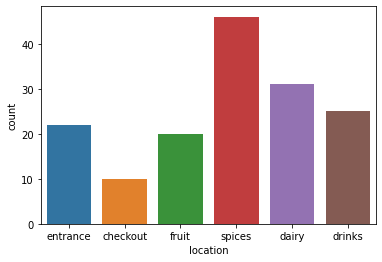

In [417]:
sns.countplot(data= df, x="location")

1. Calculate the total number of customers in each section

2. Calculate the total number of customers in each section over time

3. Display the number of customers at checkout over time

4. Calculate the time each customer spent in the market

5. Calculate the total number of customers in the supermarket over time.

In [418]:
'''number of customers in each section'''
df.groupby(["location"]).count()

,time,customer_no,hour,min
location,,,,
checkout,10,10,10,10
dairy,31,31,31,31
drinks,25,25,25,25
entrance,22,22,22,22
fruit,20,20,20,20
spices,46,46,46,46


<AxesSubplot:xlabel='min', ylabel='count'>

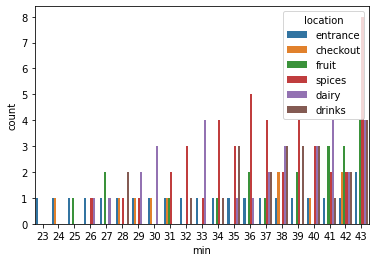

In [426]:
sns.countplot(data=df, x="min", hue="location")


<AxesSubplot:xlabel='min', ylabel='count'>

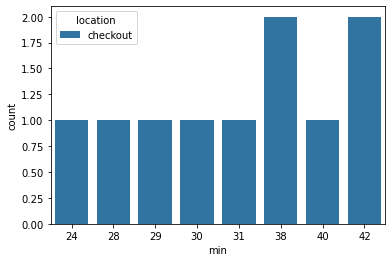

In [420]:
sns.countplot(data=df.loc[df["location"] == "checkout"], x="min", hue = "location")

In [421]:
df[df["location"] == "entrance"].sort_values(["hour", "min"]).count()

time           22
customer_no    22
location       22
hour           22
min            22
dtype: int64

In [422]:
# entrance = df[df["location"] == "entrance"].groupby("time").count()
# drinks = df[df["location"] == "drinks"].groupby("time").count()
# dairy = df[df["location"] == "dairy"].groupby("time").count()
# fruit = df[df["location"] == "fruit"].groupby("time").count()
# spices = df[df["location"] == "spices"].groupby("time").count()
# checkout = df[df["location"] == "checkout"].groupby("time").count()

In [423]:
entrance = df[df["location"] == "entrance"].groupby(["hour", "min"]).count()
drinks = df[df["location"] == "drinks"].groupby(["hour", "min"]).count()
dairy = df[df["location"] == "dairy"].groupby(["hour", "min"]).count()
fruit = df[df["location"] == "fruit"].groupby(["hour", "min"]).count()
spices = df[df["location"] == "spices"].groupby(["hour", "min"]).count()
checkout = df[df["location"] == "checkout"].groupby(["hour", "min"]).count()

<AxesSubplot:xlabel='hour,min'>

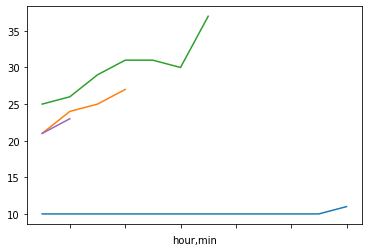

In [424]:
entrance.location.rolling(10).sum().plot()
dairy.location.rolling(10).sum().plot()
spices.location.rolling(10).sum().plot()
fruit.location.rolling(10).sum().plot()
drinks.location.rolling(10).sum().plot()
checkout.location.rolling(10).sum().plot()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

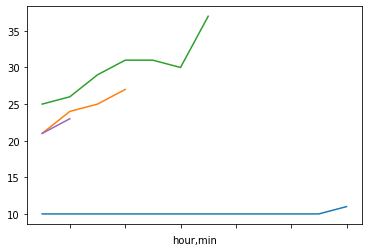

In [425]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
  
# Y-axis values
y1 = entrance.location.rolling(10).sum().plot()
y2 = dairy.location.rolling(10).sum().plot()
y3 = spices.location.rolling(10).sum().plot()
y4 = fruit.location.rolling(10).sum().plot()
y5 = drinks.location.rolling(10).sum().plot()
y6 = checkout.location.rolling(10).sum().plot()
  
# Function to plot  
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot(y5)
plt.plot(y6)
  
# Function add a legend  
plt.legend(["entrance", "dairy", "spices", "fruit", "drinks", "chekcout"], loc ="lower right")
  
# function to show the plot
plt.show()

<AxesSubplot:xlabel='timestamp'>

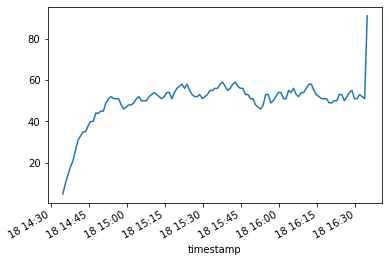

In [ ]:
df.groupby("time")["location"].count().plot()

In [ ]:
df.sort_values(["customer_no", "time"], inplace=True)
df.reset_index(inplace=True)
df.head(20)

,index,timestamp,customer_no,location
0,0,2022-11-18 13:52:19.461210,1,entrance
1,2,2022-11-18 13:53:19.461210,1,drinks
2,6,2022-11-18 13:54:19.461210,1,dairy
3,12,2022-11-18 13:55:19.461210,1,spices
4,20,2022-11-18 13:56:19.461210,1,spices
5,30,2022-11-18 13:57:19.461210,1,dairy
6,42,2022-11-18 13:58:19.461210,1,fruit
7,54,2022-11-18 13:59:19.461210,1,spices
8,67,2022-11-18 14:00:19.461210,1,dairy
9,82,2022-11-18 14:01:19.461210,1,fruit


<AxesSubplot:xlabel='timestamp'>

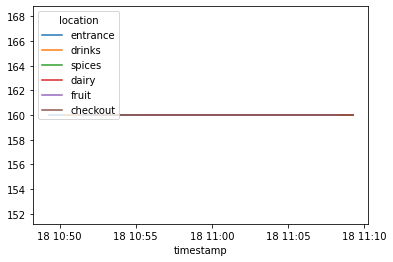

In [ ]:
sns.lineplot(data=df, x="time", y=df["location"].count(), hue="location")

In [ ]:
import numpy as np
import random
customers_list = []

customers_in = np.arange(random.randint(0,5))
customer_no = 0
for i in (customers_in):
            customer_no +=1
            new_customer_name = str("cust-" + str(customer_no))
            customers_list.append(new_customer_name)

customers_list

['cust-1', 'cust-2']

In [ ]:
from datetime import time
time(hour=7, minute=20, second=0, microsecond=0).isoformat(timespec='minutes')

'07:20'

In [ ]:
"""
Start with this to implement the supermarket simulator.
"""

import numpy as np
import pandas as pd
from datetime import time

class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        self.customer_list = []
        self.minutes = 0
        self.customers_in = list(np.arange(random.randint(0,5)))
        self.observation_time = np.arange(20)
        #self.initial_time = time(hour=7, minute=20, second=0, microsecond=0).isoformat(timespec='minutes')

    def __repr__(self):
        return f'<The Customers {self.customer_list} are in the Supermarket>'

    def get_time(self):
        """current time in HH:MM format,
        """
        self.time = 'Timestamp: {:%H:%M:%S}'.format(datetime.datetime())
        return None

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        return None

    def next_minute(self, current_customer):
        """propagates all customers to the next state.
        """
        Customer.next_state(current_customer)
        self.minutes += 1


        for i in observation_time:
            for customer in customers_in:
                cust.next_state(customer)
                store.add_customer(customer)

                return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        return None

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        return None

store = Supermarket()
print(store.customers_in)
print(store)

[0, 1, 2]
<The Customers [] are in the Supermarket>


In [ ]:
from random import randrange
import numpy as np

# loop for time (from 0 to max. limit of time). add and remove customers based on .  for 2 hours every minute add certain amount of customers to shop, 
# withing loop: add minute+ update the next state for each customer

####################################################################
# we have 2 nested loops
# 1st loop is iterating through time (from min=0 to min=some_max_number)
# 2nd loop (inside 1st one) is iterating through customer list and updating their next State
# and also adding new customers to the customer list, and removing the ones who checked out

# für 60*2 stunden sollen jede minute zwischen 0 und 5 customer in den Supermarkt gehen.
# für jede minute soll dann gespeichert werden, das x customer zum laden zugefügt wurden, das x customer den laden verlassen haben,
# in welcher minute sie sich in welchem state (next state) befinden. 

# Initialize the class Supermarket as store, using the transitionmatrix
store = Supermarket(P)

# Using the class Customer, add new customers with their iitial information to the customer list 
# entrance is the default initial state
cust = Customer()

# Generate random amount of customers (between 0 and 5) to enter the store
n = random.randint(0,5)
customers_in = list(np.arange(n))
customers_in

# Generate timeframe (in minutes) that we want to observe the customers behaviour in the store
observation_time = np.arange(2)

for i in observation_time:
    for customer in customers_in:
        cust.next_state(customer)
        store.add_customer(customer)
        # if cust.state() != "checkout":
        #     store.add_customer(customers_in)
        # else:
        #     store.rm_customer(customers_in)

# Add new customer information to the customer list if they are still shopping and not at checkout

#print(store.add_customer(customers_in))
print(store.customers_list)

# for i in observation_time:
#     print(store.add_customer(customers_in))


IndexError: invalid index to scalar variable.

In [ ]:
store = Supermarket()
#add customers
print(store.add_customers(cust1))
print(store.customers_list)
#remove customers
print(store.rm_customers(cust1))
print(store.customers_list)

None
[<Customer is in drinks>]


In [ ]:
# make loop for one customer from entrance to checkout
cust2 = Customer()

path_in_store = []

for cust2.is_active() == True:
    if cust2.state == "entrance":
        step = "entrance"
        path_in_store.append(step)
    else: 
        step = cust1.next_state(probs) 
        path_in_store.append(step)


SyntaxError: invalid syntax (2715691310.py, line 6)

In [ ]:
path_in_store

['entrance']

## << Run a MCMC Simulation for a single customer >>

In [ ]:
cust1 = Customer()

print(cust1)
print(cust1.next_state(probs))
print(cust1)
print(cust1.is_active())
print(cust1.next_state(probs))
print(cust1)
print(cust1.is_active())

<Customer is in entrance>
[0.0, 0.2875755540631296, 0.15352585627938214, 0.3774345198119543, 0.18146406984553393]
drinks
<Customer is in drinks>
True
[0.5372599231754162, 0.02714468629961588, 0.0, 0.21895006402048656, 0.21664532650448143]
dairy
<Customer is in dairy>
True


## << Extend the Simulation to multiple customers >>